# <center>Comprehensive Data Preprocessing and Imputation Techniques for Loan Approval Dataset<center>

    
    
    
In this file, we will preprocess a loan approval dataset, which includes <b>data cleaing ,treating duplicate values, 
removing leading and trailing spaces and removing unrelated columns</b>.

We will handle missing values by using different techniques, such as:

<b>For Categorical columns:</b>
1. Mode/Most frequent value Imputation
2. Random Value Imputation
3. Missing Indicator

<b>For Numerical columns:</b>
1. Mean Imputation
2. Median Imputation
3. Random Value Imputation
4. KNN Imputer
5. Iterative Imputer

<b>We will also handle outliers by using three techniques </b>
1. Boundary Value Method
2. IQR Method
3. Percentile Method

Finally,we will select the most suitable tecnique amoung the these for further analysis.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer,IterativeImputer
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv('loan_dataset.csv')

In [4]:
df=data.copy()

In [5]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,NaN,No,9600000,29900000,12,778,2400000.0,17600000.0,NaN,8000000.0,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,NaN,2200000.0,8800000.0,3300000.0,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000.0,NaN,33300000.0,12800000.0,Rejected
3,4,3,NaN,No,8200000,30700000,8,467,18200000.0,3300000.0,23300000.0,7900000.0,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000.0,8200000.0,29400000.0,5000000.0,Rejected


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   loan_id                   4269 non-null   int64  
 1   no_of_dependents          4269 non-null   int64  
 2   education                 3629 non-null   object 
 3   self_employed             3928 non-null   object 
 4   income_annum              4269 non-null   int64  
 5   loan_amount               4269 non-null   int64  
 6   loan_term                 4269 non-null   int64  
 7   cibil_score               4269 non-null   int64  
 8   residential_assets_value  3885 non-null   float64
 9   commercial_assets_value   4141 non-null   float64
 10  luxury_assets_value       4013 non-null   float64
 11  bank_asset_value          3843 non-null   float64
 12  loan_status               4269 non-null   object 
dtypes: float64(4), int64(6), object(3)
memory usage: 433.7+ KB


In [7]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,3.885000e+03,4.141000e+03,4.013000e+03,3.843000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.471197e+06,4.974934e+06,1.509556e+07,4.960161e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.513098e+06,4.377911e+06,9.128965e+06,3.229474e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.450000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [8]:
df.isnull().sum()

loan_id                       0
no_of_dependents              0
education                   640
self_employed               341
income_annum                  0
loan_amount                   0
loan_term                     0
cibil_score                   0
residential_assets_value    384
commercial_assets_value     128
luxury_assets_value         256
bank_asset_value            426
loan_status                   0
dtype: int64

In [9]:
df.isnull().mean()*100

loan_id                      0.000000
no_of_dependents             0.000000
education                   14.991801
self_employed                7.987819
income_annum                 0.000000
loan_amount                  0.000000
loan_term                    0.000000
cibil_score                  0.000000
residential_assets_value     8.995081
commercial_assets_value      2.998360
luxury_assets_value          5.996721
bank_asset_value             9.978918
loan_status                  0.000000
dtype: float64

In [10]:
df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [11]:
# droping unrelated column

df.drop('loan_id',axis=1,inplace=True)

In [12]:
df.shape

(4269, 12)

In [13]:
categorical=[]
numerical=[]

for col in df:
    if df[col].dtype=='O':
        categorical.append(col)
        
    else:
        numerical.append(col)

In [14]:
# removing leading and trailing spaces from cols

df[categorical]=df[categorical].apply(lambda x:x.str.strip())

In [15]:

print("categorical cols:",categorical)
print()
print("numerical cols:",numerical)

categorical cols: ['education', 'self_employed', 'loan_status']

numerical cols: ['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']


# <center>====Handling Missing Values====<center>

In [16]:
df.isnull().sum()

no_of_dependents              0
education                   640
self_employed               341
income_annum                  0
loan_amount                   0
loan_term                     0
cibil_score                   0
residential_assets_value    384
commercial_assets_value     128
luxury_assets_value         256
bank_asset_value            426
loan_status                   0
dtype: int64

In [17]:
df.isnull().mean()*100

no_of_dependents             0.000000
education                   14.991801
self_employed                7.987819
income_annum                 0.000000
loan_amount                  0.000000
loan_term                    0.000000
cibil_score                  0.000000
residential_assets_value     8.995081
commercial_assets_value      2.998360
luxury_assets_value          5.996721
bank_asset_value             9.978918
loan_status                  0.000000
dtype: float64

In [18]:
print(categorical)
print()
print(numerical)

['education', 'self_employed', 'loan_status']

['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']


# <center>Handling missing values on categorical columns<center>

In [19]:
df[categorical].isnull().sum()

education        640
self_employed    341
loan_status        0
dtype: int64

In [20]:
cat_missing_cols=df[categorical].iloc[:,:2]
cat_missing_cols.head()

,education,self_employed
0,NaN,No
1,Not Graduate,Yes
2,Graduate,No
3,NaN,No
4,Not Graduate,Yes


# <center>====Mode imputation====</center>

In [21]:
df_mode=df.copy()

In [22]:
df_mode[categorical].isnull().sum()

education        640
self_employed    341
loan_status        0
dtype: int64

In [23]:
 def mode_imputation(data,columns):
        data=df
        for col in columns:
            
            mode=df_mode[col].mode()[0]

            df_mode[col].value_counts()

            df_mode[col].fillna(mode,inplace=True)

In [24]:
mode_imputation(df_mode,cat_missing_cols)

In [25]:
df_mode[categorical].isnull().sum()

education        0
self_employed    0
loan_status      0
dtype: int64

# <center>Comparing graphs before and after mode imputation<center>

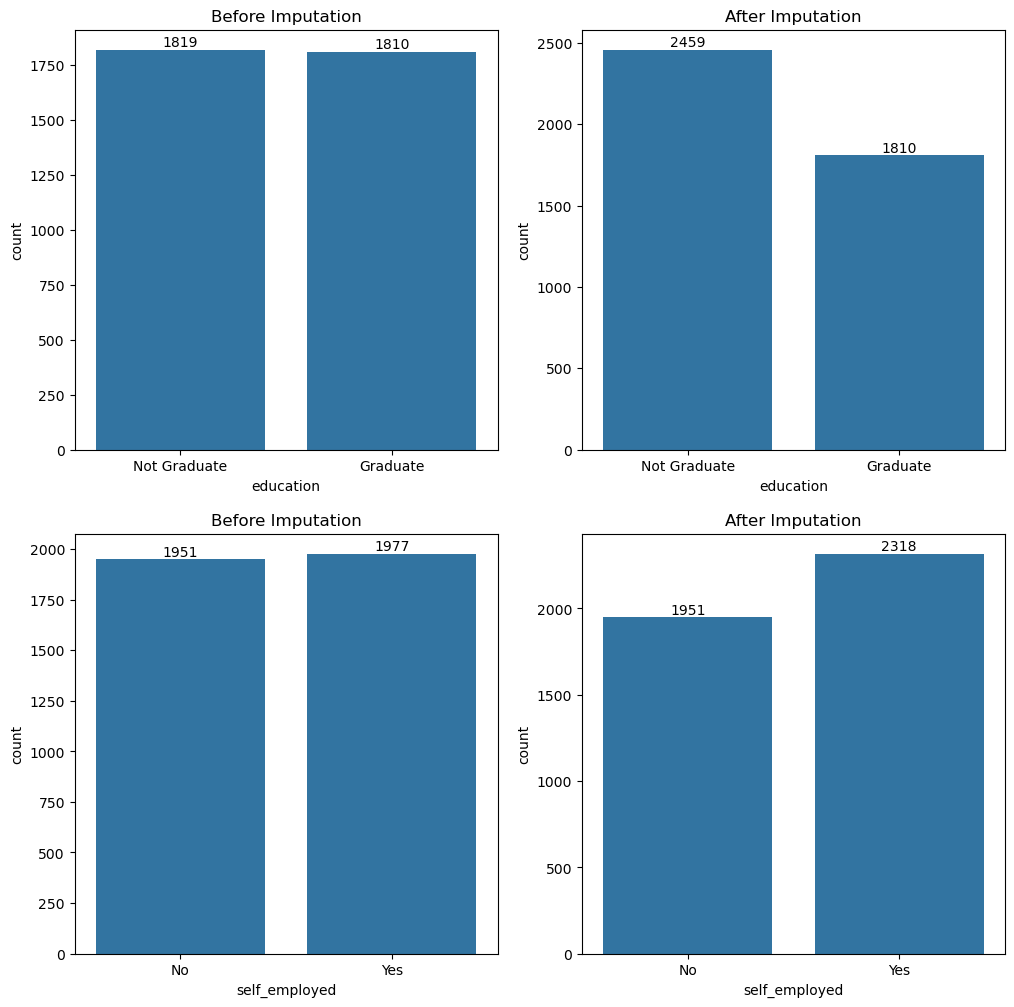

In [27]:
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.title('Before Imputation')
ax=sns.countplot(df,x='education')
for bar in ax.containers:
    ax.bar_label(bar)


plt.subplot(2,2,2)
plt.title('After Imputation')
ax=sns.countplot(df_mode,x='education')
for bar in ax.containers:
    ax.bar_label(bar) 
    
plt.subplot(2,2,3)
plt.title('Before Imputation')
ax=sns.countplot(df,x='self_employed')
for bar in ax.containers:
    ax.bar_label(bar)


plt.subplot(2,2,4)
plt.title('After Imputation')
ax=sns.countplot(df_mode,x='self_employed')
for bar in ax.containers:
    ax.bar_label(bar) 


> <b>Mode imputation</b> is not preferable here beacuse one category is dominating in both the columns after imputation 

# <center>====Random value  imputation====</center>

In [29]:
df_ran=df.copy()

In [30]:
df_ran[categorical].isnull().sum()

education        640
self_employed    341
loan_status        0
dtype: int64

In [31]:
def randomvalueimpuation_cat(data,columns):
    df=data
    for col in columns:
        non_missing=df_ran[col].dropna().values
        df_ran[col]=df_ran[col].apply(lambda x:np.random.choice(non_missing)if pd.isnull(x) else x)

In [32]:
randomvalueimpuation_cat(df_ran,cat_missing_cols)

In [33]:
df_ran[categorical].isnull().sum()

education        0
self_employed    0
loan_status      0
dtype: int64

# <center>Comparing graphs before and after random value imputation<center>

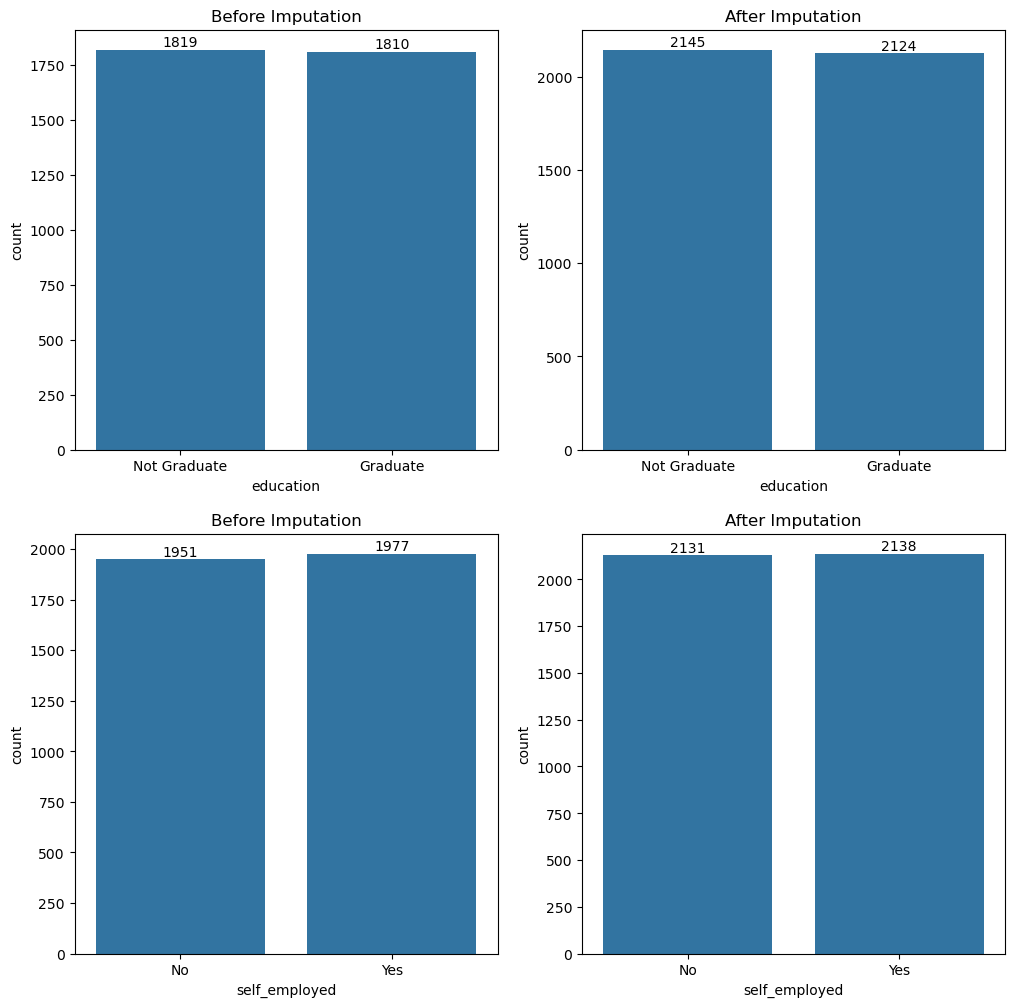

In [34]:
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.title('Before Imputation')
ax=sns.countplot(df,x='education')
for bar in ax.containers:
    ax.bar_label(bar)

plt.subplot(2,2,2)
plt.title('After Imputation')
ax=sns.countplot(df_ran,x='education')
for bar in ax.containers:
    ax.bar_label(bar) 
    
plt.subplot(2,2,3)
plt.title('Before Imputation')
ax=sns.countplot(df,x='self_employed')
for bar in ax.containers:
    ax.bar_label(bar)

plt.subplot(2,2,4)
plt.title('After Imputation')
ax=sns.countplot(df_ran,x='self_employed')
for bar in ax.containers:
    ax.bar_label(bar)     

> <b>Random value imputation</b> gives better results in both the column .

# <center>====Missing value indicator====<center> 

In [36]:
df_mis=df.copy()

In [37]:
df_mis[categorical].isnull().sum()

education        640
self_employed    341
loan_status        0
dtype: int64

In [38]:
for col in cat_missing_cols:
    df_mis[col].fillna('Missing',inplace=True)
    

In [39]:
df_mis[categorical].isnull().sum()

education        0
self_employed    0
loan_status      0
dtype: int64

# <center>Comparing graph before and after missing indicator <center>

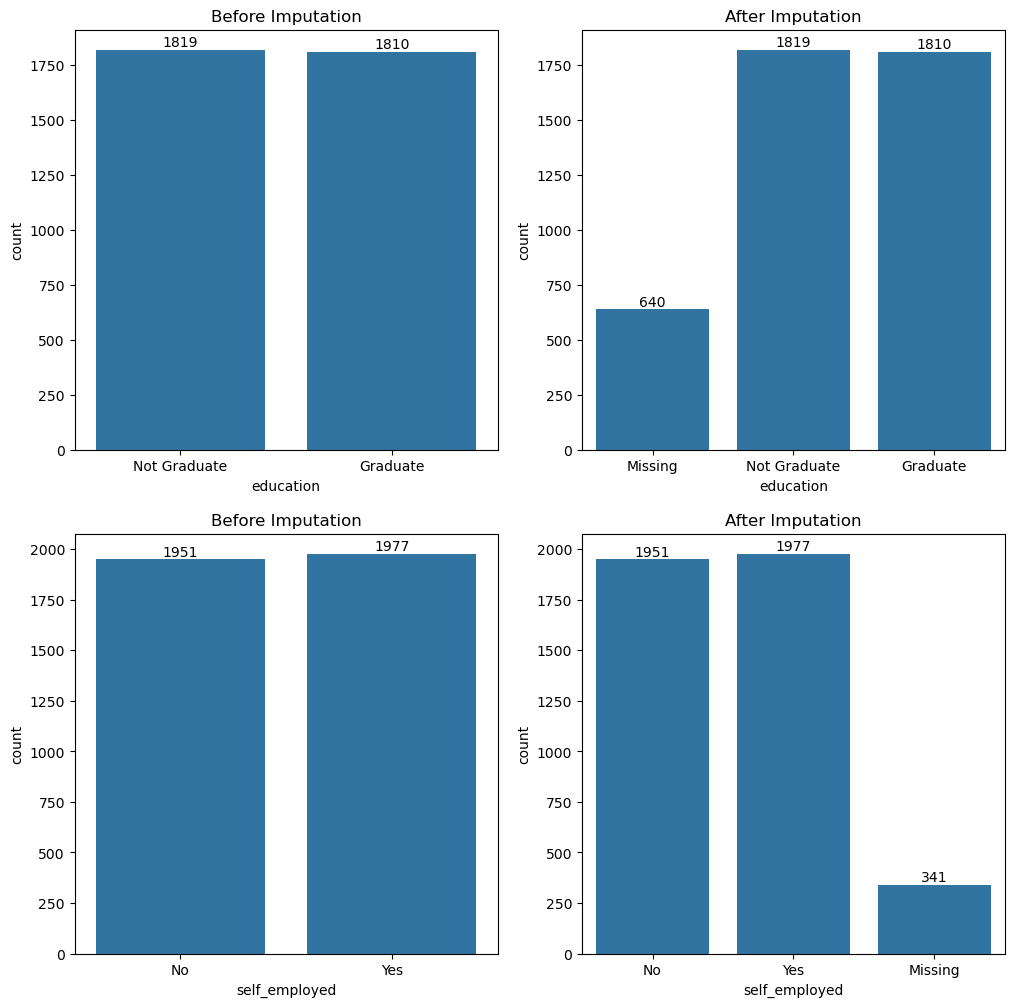

In [41]:
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.title('Before Imputation')
ax=sns.countplot(df,x='education')
for bar in ax.containers:
    ax.bar_label(bar)

plt.subplot(2,2,2)
plt.title('After Imputation')
ax=sns.countplot(df_mis,x='education')
for bar in ax.containers:
    ax.bar_label(bar) 
    
plt.subplot(2,2,3)
plt.title('Before Imputation')
ax=sns.countplot(df,x='self_employed')
for bar in ax.containers:
    ax.bar_label(bar)

plt.subplot(2,2,4)
plt.title('After Imputation')
ax=sns.countplot(df_mis,x='self_employed')
for bar in ax.containers:
    ax.bar_label(bar)    

# Conclusion:
> <b> Random value imputation </b> gives better results as compare to Mode Imputation and Missing Indicator.

# <center>Handling Missing Values On Numerical Columns<center>

In [42]:
df[numerical].isnull().sum()

no_of_dependents              0
income_annum                  0
loan_amount                   0
loan_term                     0
cibil_score                   0
residential_assets_value    384
commercial_assets_value     128
luxury_assets_value         256
bank_asset_value            426
dtype: int64

# <center>Analysing distribution of numerical cols<center>

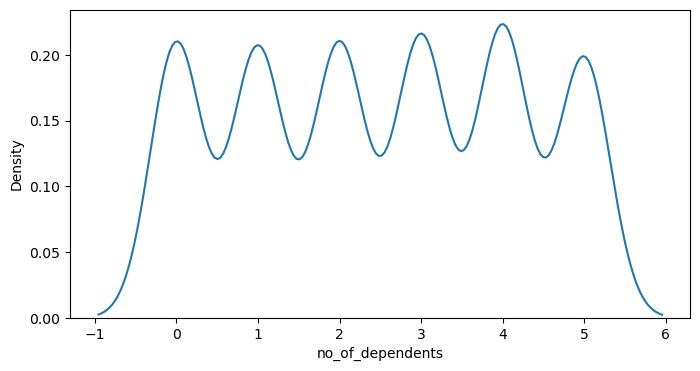

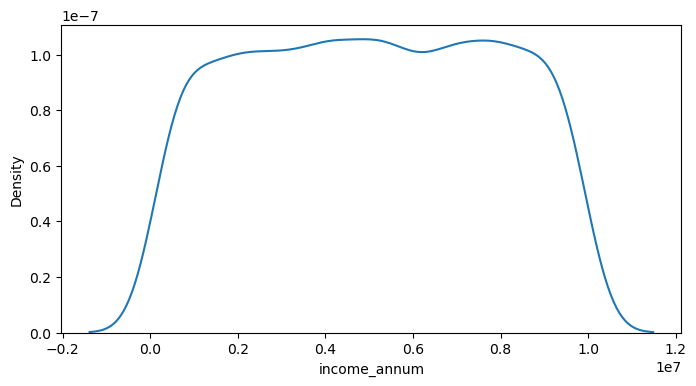

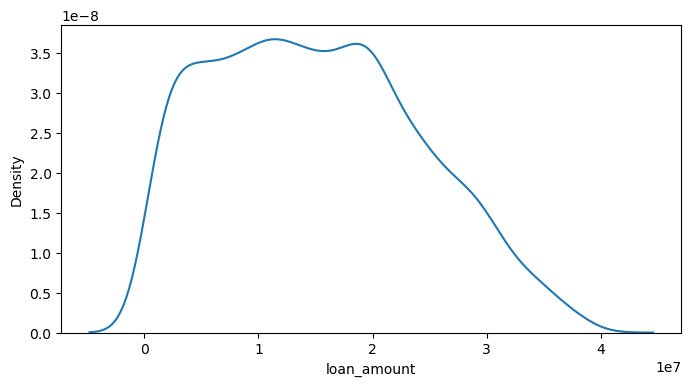

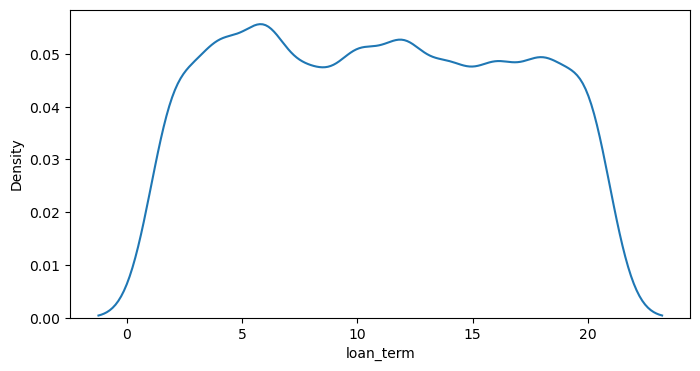

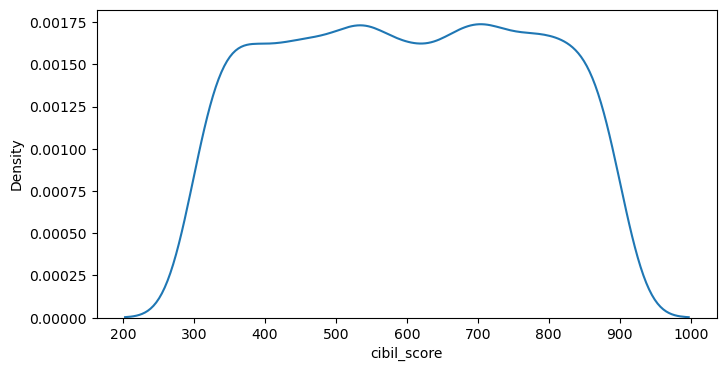

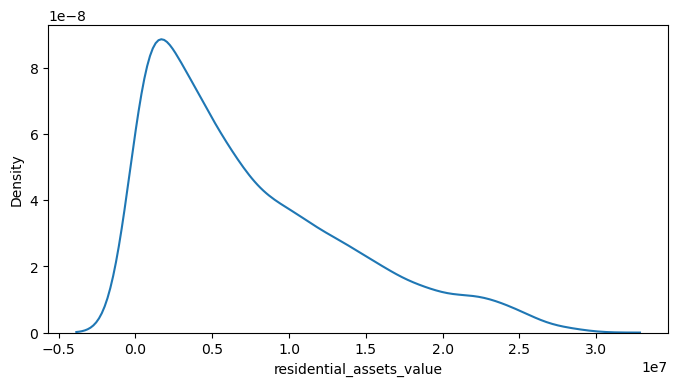

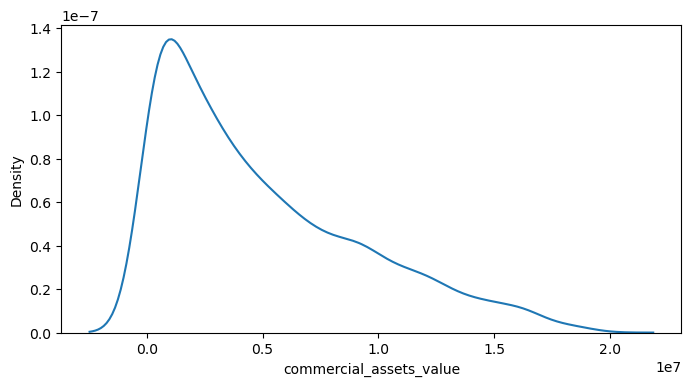

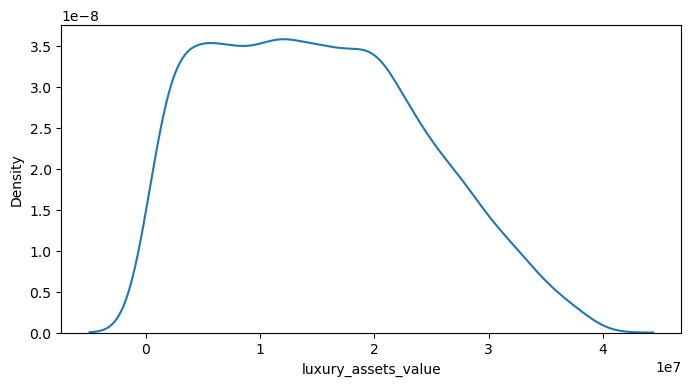

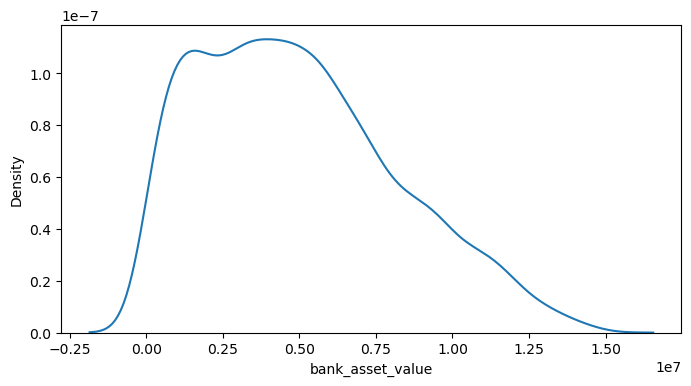

In [43]:
for num in df[numerical]:
    plt.figure(figsize=(8,4))
    sns.kdeplot(df,x=num)

In [48]:
num_missing_cols=df[numerical].iloc[:,5:]
num_missing_cols.isnull().sum()

residential_assets_value    384
commercial_assets_value     128
luxury_assets_value         256
bank_asset_value            426
dtype: int64

# <center>====Mean Imputation====</center>

In [49]:
df_mean=df_ran.copy()

In [50]:
df_mean[numerical].isnull().sum()

no_of_dependents              0
income_annum                  0
loan_amount                   0
loan_term                     0
cibil_score                   0
residential_assets_value    384
commercial_assets_value     128
luxury_assets_value         256
bank_asset_value            426
dtype: int64

In [51]:
def meanimputation(data,columns):
    data=df
    
    for col in columns:
        mean=df_mean[col].mean() 
        df_mean[col].fillna(mean,inplace=True)
        

In [52]:
meanimputation(df_mean,num_missing_cols)

In [53]:
df_mean[numerical].isnull().sum()

no_of_dependents            0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
dtype: int64

# <center>Comparing distribution of columns before and after mean imputation<center>

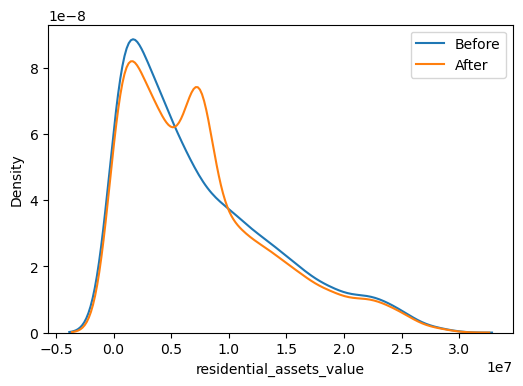

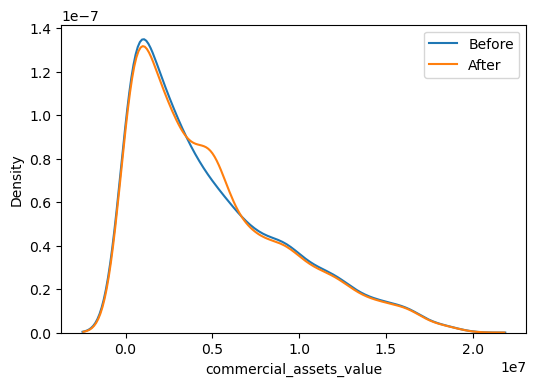

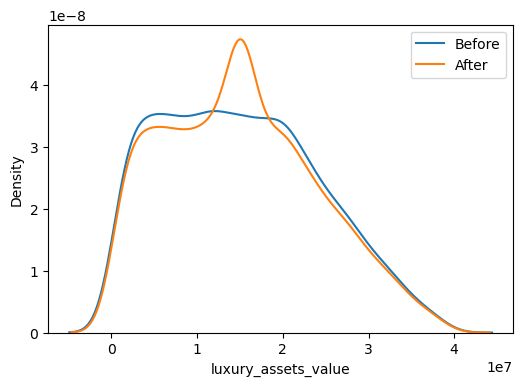

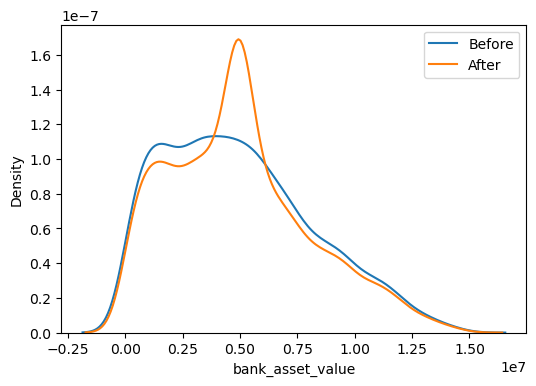

In [54]:
for col in num_missing_cols:
    plt.figure(figsize=(6,4))
    sns.kdeplot(df,x=col,label='Before')
    sns.kdeplot(df_mean,x=col,label='After')
    plt.legend()
    plt.show()

> Mean imputation is not preferable for <b>columns residential_assets_value,luxury_assets_value and bank_asset_value</b>
  because there are very big difference in distribution of data after the imputation in all three columns.
  
> But for <b>commercial_assets_value</b>  Mean imputation can be used as there is very less difference in distribution after             imputation.

# <center>====Median Imputation====<center>

In [55]:

df_mdn=df_ran.copy()

In [56]:
df_mdn[numerical].isnull().sum()

no_of_dependents              0
income_annum                  0
loan_amount                   0
loan_term                     0
cibil_score                   0
residential_assets_value    384
commercial_assets_value     128
luxury_assets_value         256
bank_asset_value            426
dtype: int64

In [57]:
def medianimputation(data,columns):
    data=df
    
    for col in columns:
        median=df_mdn[col].median() 
        df_mdn[col].fillna(median,inplace=True)
        

In [58]:
medianimputation(df_mdn,num_missing_cols)

In [59]:
df_mdn[numerical].isnull().sum()

no_of_dependents            0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
dtype: int64

# <center>Comparing distribution of columns before and after median imputation<center>

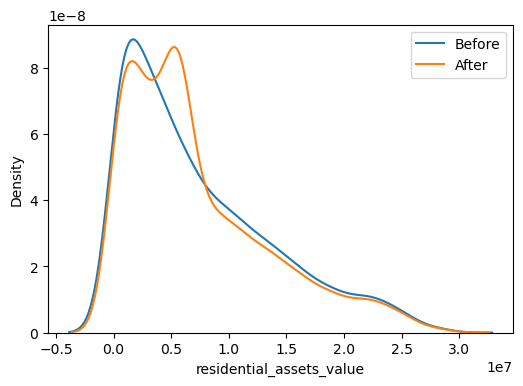

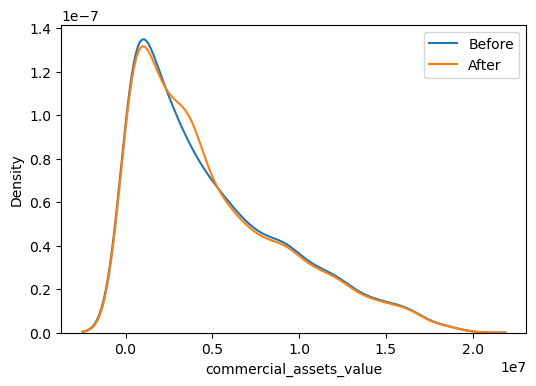

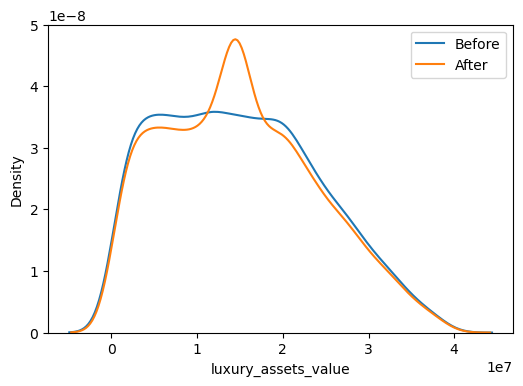

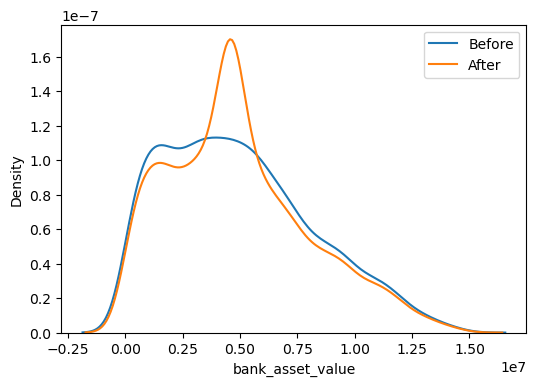

In [60]:
for col in num_missing_cols:
    plt.figure(figsize=(6,4))
    sns.kdeplot(df,x=col,label='Before')
    sns.kdeplot(df_mdn,x=col,label='After')
    plt.legend()
    plt.show()

> <b>Median Imputation</b> gives same reults like <b>Mean Imputation</b> and there are very big changes in distribution of 
  columns after imputation.
  
> So <b>Median Imputation</b> cannot be preferable here.


# <center>====Random Value Imputation====<center>

In [61]:
df_ran1=df_ran.copy()

In [62]:
df_ran1[numerical].isnull().sum()

no_of_dependents              0
income_annum                  0
loan_amount                   0
loan_term                     0
cibil_score                   0
residential_assets_value    384
commercial_assets_value     128
luxury_assets_value         256
bank_asset_value            426
dtype: int64

In [63]:
def randomvalueimputation(data,columns):
    data=df
    for col in columns:
        missing=df_ran1[col].isnull().sum()
        
        pool = df_ran1[col].dropna().sample(missing).values
        
        df_ran1[col][df_ran1[col].isnull()]=pool
        

In [64]:
randomvalueimputation(df_ran1,num_missing_cols)

In [65]:
df_ran1[numerical].isnull().sum()

no_of_dependents            0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
dtype: int64

# <center>Comparing distribution of columns before and after Random value imputation<center>

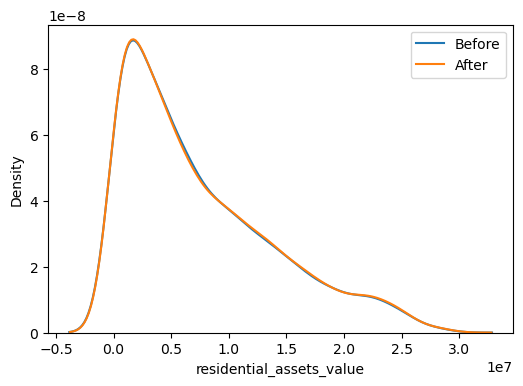

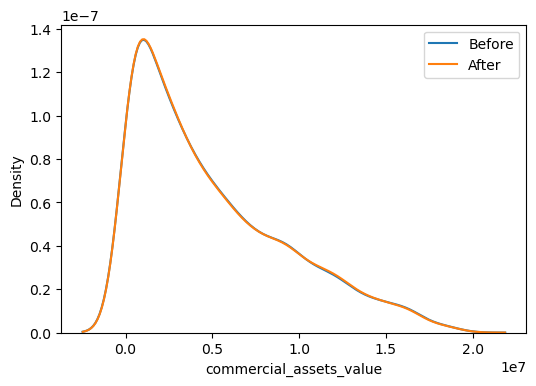

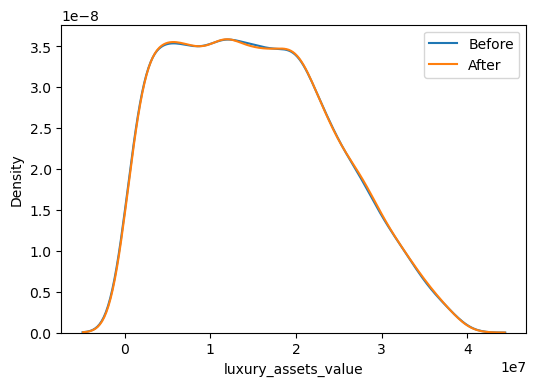

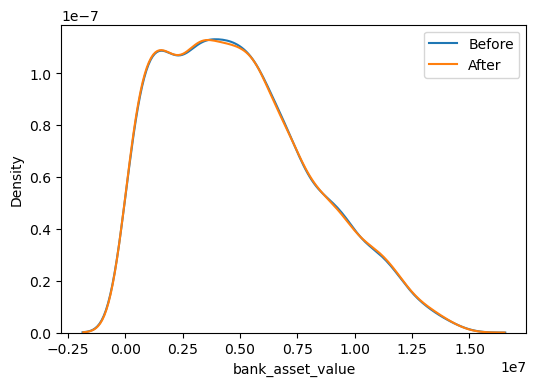

In [66]:
for col in num_missing_cols:
    plt.figure(figsize=(6,4))
    sns.kdeplot(df,x=col,label='Before')
    sns.kdeplot(df_ran1,x=col,label='After')
    plt.legend()
    plt.show()

> <b>Random value imputation</b> is preferable for all four columns as there's no changes in distribution of data after 
   imputation.
    

# <center>====KNN Imputer====<center>

In [67]:
knn=KNNImputer(n_neighbors=5)

In [68]:
df_knn=df_ran.copy()

In [69]:
df_knn[numerical].isnull().sum()

no_of_dependents              0
income_annum                  0
loan_amount                   0
loan_term                     0
cibil_score                   0
residential_assets_value    384
commercial_assets_value     128
luxury_assets_value         256
bank_asset_value            426
dtype: int64

In [70]:
df_knn=knn.fit_transform(df_knn[numerical])
df_knn=pd.DataFrame(data=df_knn,columns=numerical)

In [71]:
df_knn[numerical].isnull().sum()

no_of_dependents            0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
dtype: int64

In [72]:
df_knn.head()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,2.0,9600000.0,29900000.0,12.0,778.0,2400000.0,17600000.0,28680000.0,8000000.0
1,0.0,4100000.0,12200000.0,8.0,417.0,7720000.0,2200000.0,8800000.0,3300000.0
2,3.0,9100000.0,29700000.0,20.0,506.0,7100000.0,5480000.0,33300000.0,12800000.0
3,3.0,8200000.0,30700000.0,8.0,467.0,18200000.0,3300000.0,23300000.0,7900000.0
4,5.0,9800000.0,24200000.0,20.0,382.0,12400000.0,8200000.0,29400000.0,5000000.0


# <center>Comparing distribution of columns before and after KNN imputation<center>

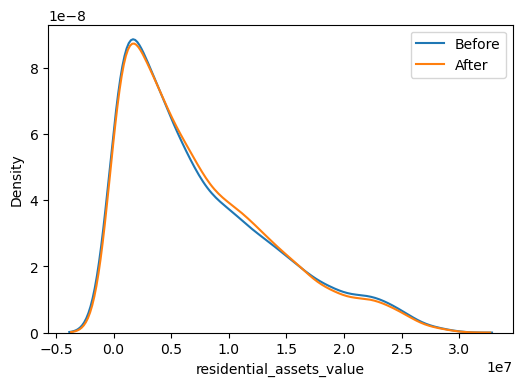

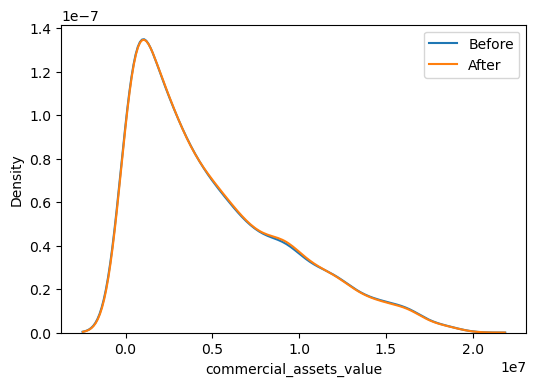

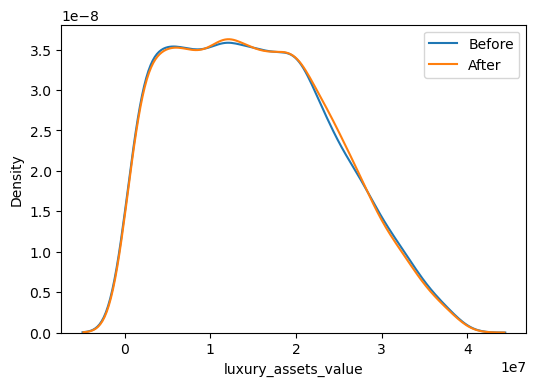

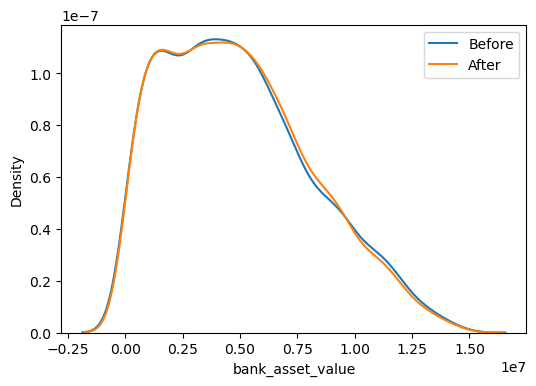

In [73]:
for col in num_missing_cols:
    plt.figure(figsize=(6,4))
    sns.kdeplot(df,x=col,label='Before')
    sns.kdeplot(df_knn,x=col,label='After')
    plt.legend()
    plt.show()

<b>kNN imputer</b> also gives good results and there's no changes in distribution of data after imputation.

# <center>====  Iterative Imputer====<center>

In [74]:
df_imp=df_ran.copy()
df_imp[numerical].isnull().sum()

no_of_dependents              0
income_annum                  0
loan_amount                   0
loan_term                     0
cibil_score                   0
residential_assets_value    384
commercial_assets_value     128
luxury_assets_value         256
bank_asset_value            426
dtype: int64

In [75]:
iterative_imputer=IterativeImputer(random_state=0,verbose=2)

In [76]:
df_imp=iterative_imputer.fit_transform(df_imp[numerical])

[IterativeImputer] Completing matrix with shape (4269, 9)
[IterativeImputer] Ending imputation round 1/10, elapsed time 0.03
[IterativeImputer] Change: 20982758.439367972, scaled tolerance: 39500.0 
[IterativeImputer] Ending imputation round 2/10, elapsed time 0.06
[IterativeImputer] Change: 410023.60282324813, scaled tolerance: 39500.0 
[IterativeImputer] Ending imputation round 3/10, elapsed time 0.06
[IterativeImputer] Change: 3795.4936948036775, scaled tolerance: 39500.0 
[IterativeImputer] Early stopping criterion reached.


In [77]:
df_imp=pd.DataFrame(data=df_imp,columns=numerical)

In [78]:
df_imp.head()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,2.0,9600000.0,29900000.0,12.0,778.0,2.400000e+06,1.760000e+07,2.881984e+07,8000000.0
1,0.0,4100000.0,12200000.0,8.0,417.0,6.150137e+06,2.200000e+06,8.800000e+06,3300000.0
2,3.0,9100000.0,29700000.0,20.0,506.0,7.100000e+06,9.064398e+06,3.330000e+07,12800000.0
3,3.0,8200000.0,30700000.0,8.0,467.0,1.820000e+07,3.300000e+06,2.330000e+07,7900000.0
4,5.0,9800000.0,24200000.0,20.0,382.0,1.240000e+07,8.200000e+06,2.940000e+07,5000000.0


# <center>Comparing distribution of columns before and after iterative imputation<center>

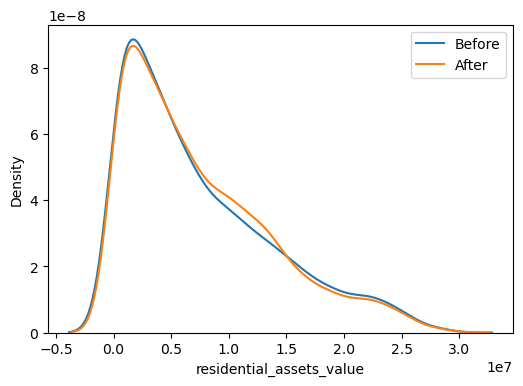

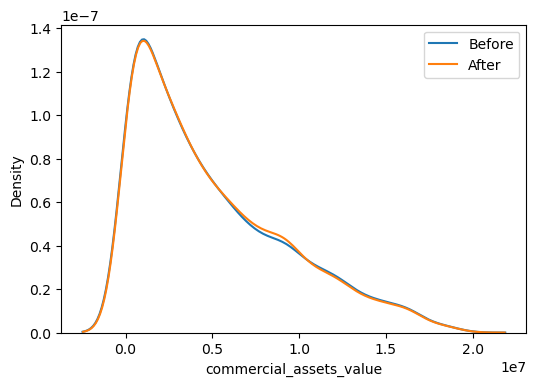

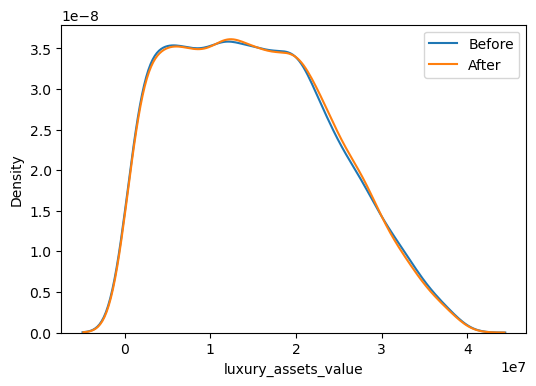

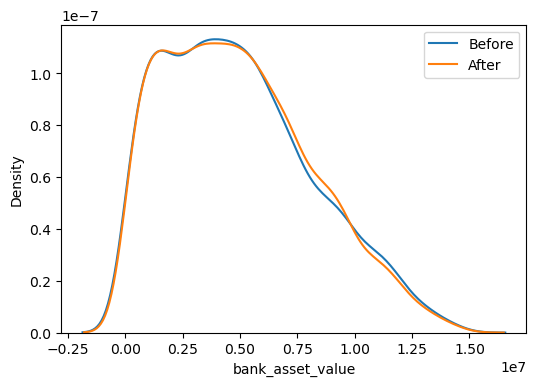

In [79]:
for col in num_missing_cols:
    plt.figure(figsize=(6,4))
    sns.kdeplot(df,x=col,label='Before')
    sns.kdeplot(df_imp,x=col,label='After')
    plt.legend()
    plt.show()

<b>iterative imputer</b> also gives good results and there's no changes in distribution of data after imputation.

# Conclusion:
> <b>Random Value Imputation </b> gives best reults on all four columns as compare to <b>Mean , Median , KNN and Iterative imputation and </b> as   there is no changes in curves after imputation

> We will select <b>Random Value Imputation</b> on all numerical columns to handle missing values

# <center>====Identifying outliers====<center>

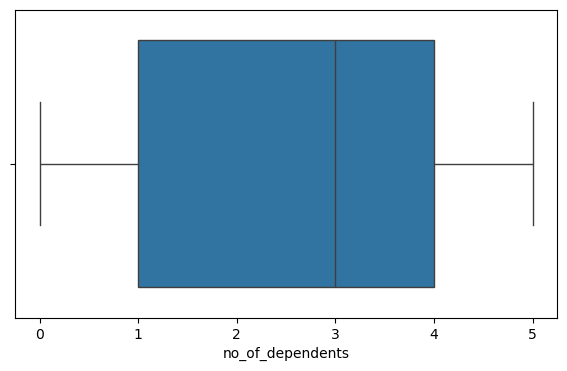

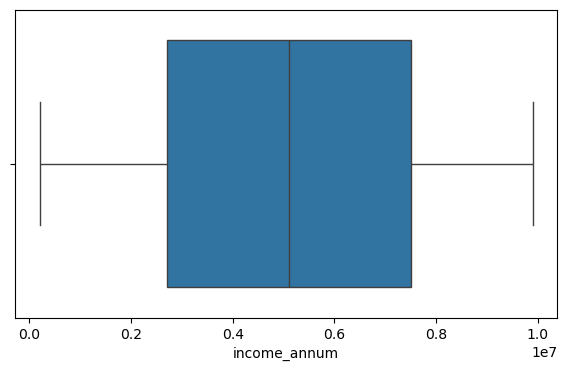

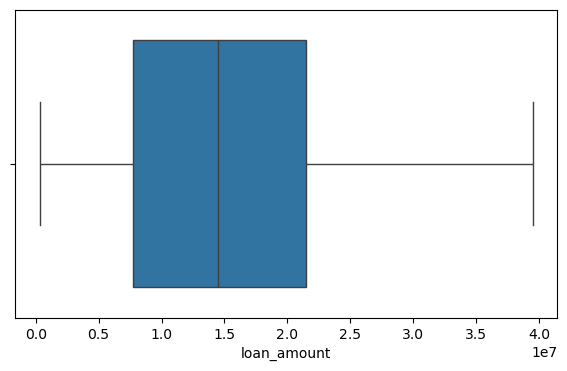

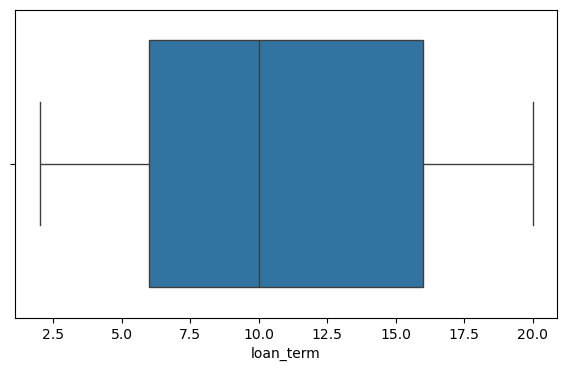

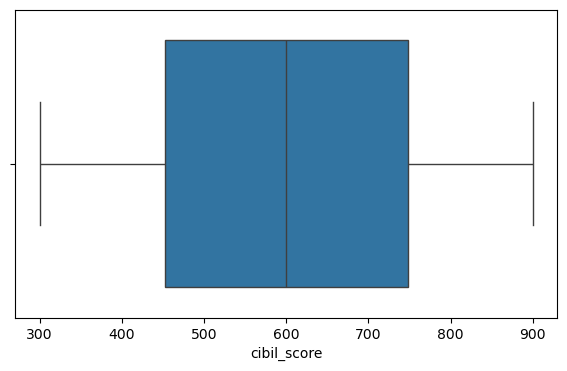

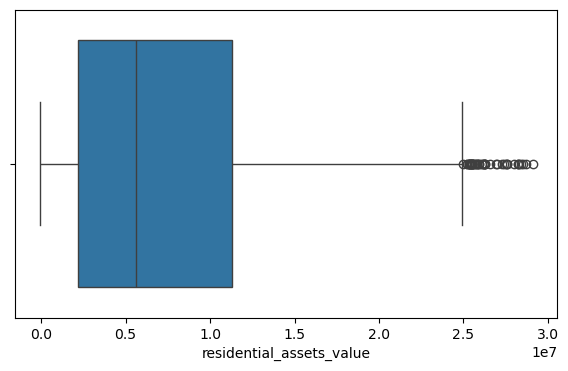

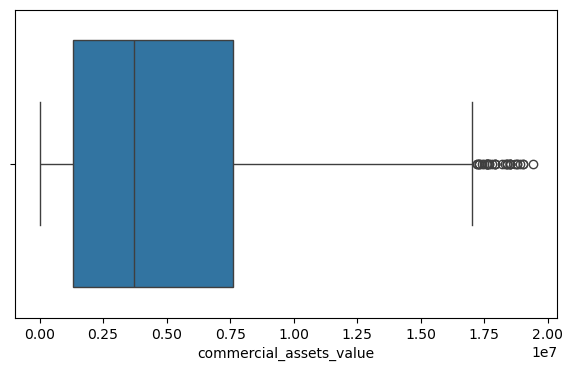

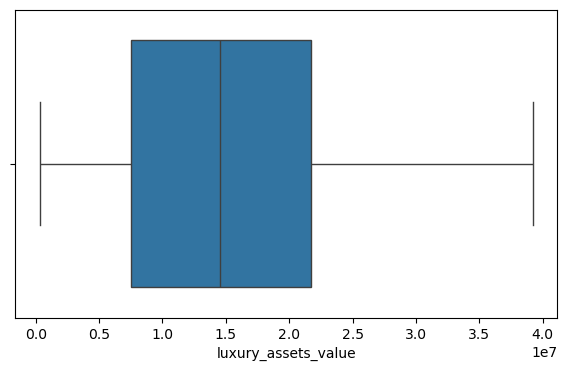

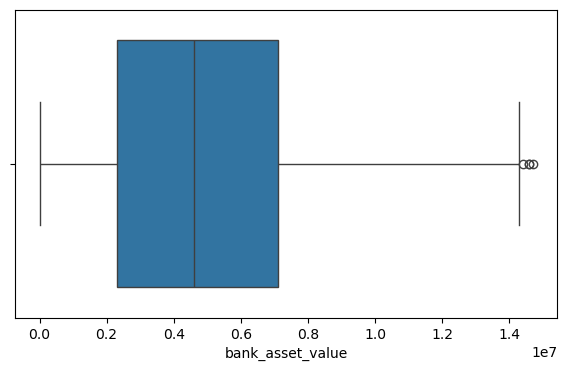

In [80]:
for col in df[numerical]:
    plt.figure(figsize=(7,4))
    sns.boxplot(df,x=col)
    

In [81]:
outliers_cols=['residential_assets_value','commercial_assets_value','bank_asset_value']

# <center>Handling outliers by boundary value method<center>

In [82]:
df1=df_ran1.copy()

In [83]:
def boundaryvale(data,columns):
    data=df
    
    for col in columns:
        ub=df1[col].mean()+3*df1[col].std()
        lb=df1[col].mean()-3*df1[col].std()


        df1[(df1[col]>ub) | (df1[col]<lb)]



        df1[(df1[col]<ub) & (df1[col]>lb)]


 
        df1[col]=np.where(df1[col]>ub,ub,np.where(df1[col]<lb,lb,df1[col]))

In [84]:
boundaryvale(df1,outliers_cols)

# <center> Comparing Curves before and after handling outliers by boundary value <center>

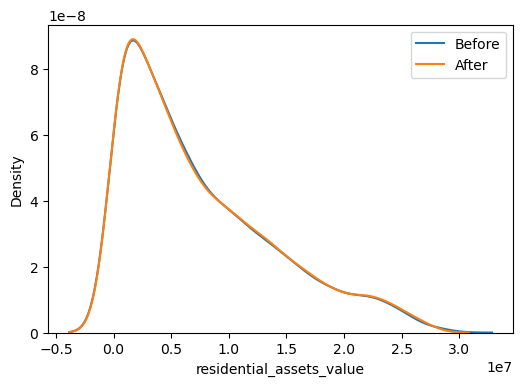

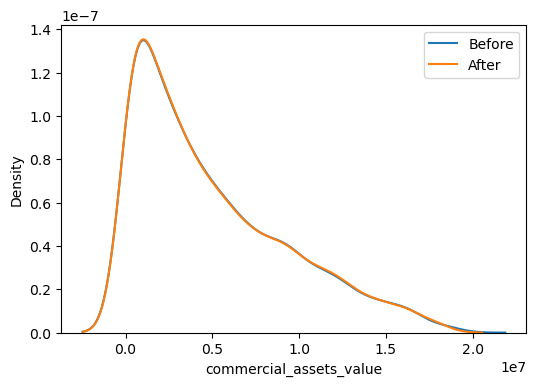

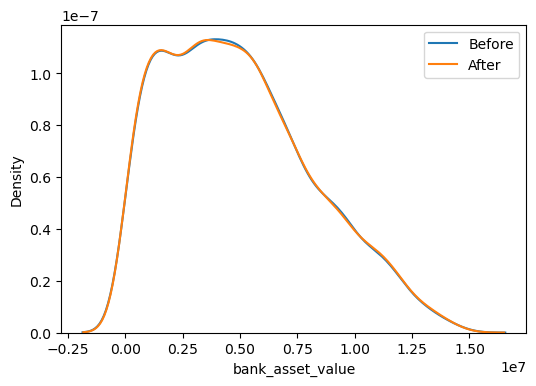

In [85]:
for col in outliers_cols:
    plt.figure(figsize=(6,4))
    sns.kdeplot(df,x=col,label='Before')
    sns.kdeplot(df1,x=col,label='After')
    plt.legend()
    plt.show()

> <b>Boundary Value Method</b> gives good result in all three columns as there's no changes in distribution of data in columns 
> after handling outliers.

# <center>Handling outliers by IQR method</center>

In [86]:
df2=df_ran1.copy()

In [87]:
def iqr_method(data,columns):
    data=df
    for col in columns:
        p25=df2[col].quantile(0.25)
        p75=df2[col].quantile(0.75)

        iqr=p75-p25
        uf=p75+1.5*iqr
        lf=p25-1.5*iqr

        df2[(df2[col]>uf) | (df2[col]<lf)]

        df2[(df2[col]<uf) & (df2[col]>lf)]

        df2[col]=np.where(df2[col]>uf,uf,np.where(df2[col]<lf,lf,df2[col]))

In [88]:
iqr_method(df2,outliers_cols)

# <center> Comparing Curves before and after handling outliers by iQR method <center>

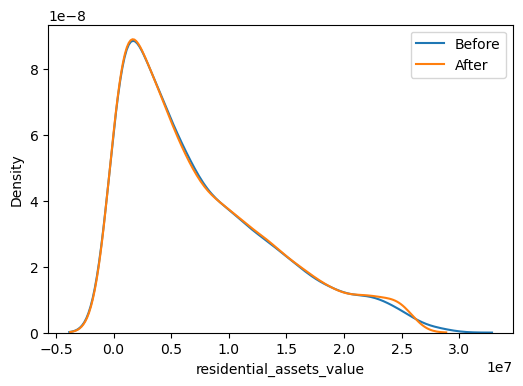

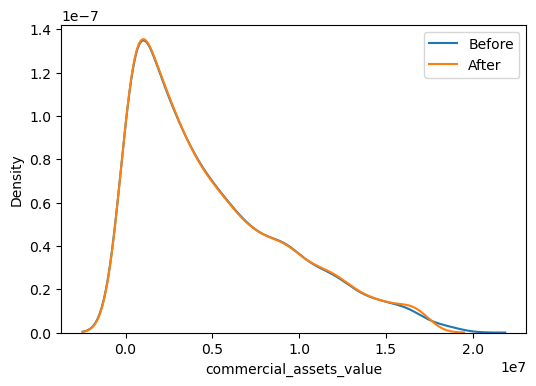

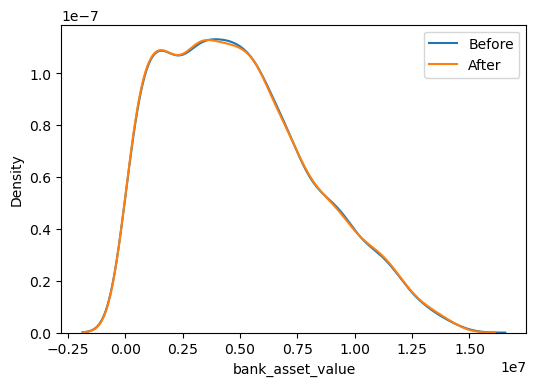

In [89]:
for col in outliers_cols:
    plt.figure(figsize=(6,4))
    sns.kdeplot(df,x=col,label='Before')
    sns.kdeplot(df2,x=col,label='After')
    plt.legend()
    plt.show()

> <b>IRQ Method</b> also gives good results on all three columns but on <b>residential_assets_value and commercial_assets_value</b>
> column there are small changes in distribution of data after handling outliers.

# <center>Handling outliers by Percentile Method</center>

In [90]:
df3=df_ran1.copy()

In [91]:
def percentile_method(data,columns):
    data=df
    
    for col in columns:
        ul=df3[col].quantile(0.95)
        ll=df3[col].quantile(0.05)


        df3[(df3[col]>ul) | (df3[col]<ll)]

        df3[(df3[col]<ul) & (df3[col]>ll)]

        df3[col]=np.where(df3[col]>ul,ul,np.where(df3[col]<ll,ll,df3[col]))

In [92]:
percentile_method(df3,outliers_cols)

# <center>Comparing curves before and after handling outliers by percentile method <center>

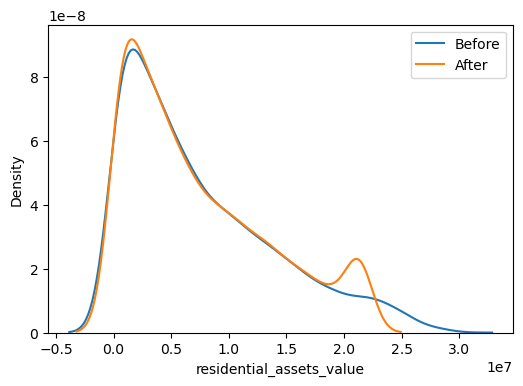

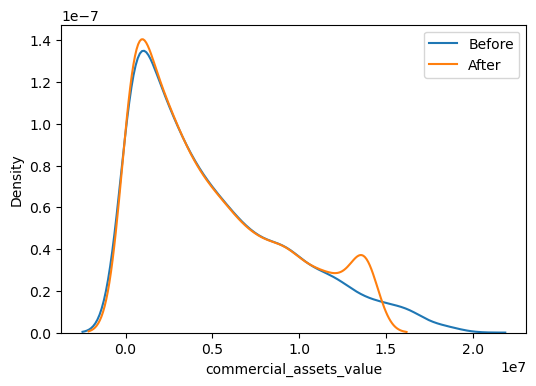

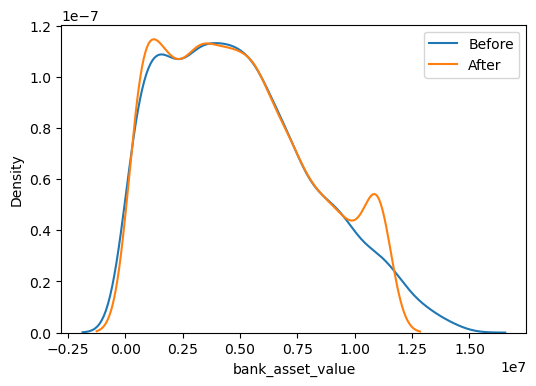

In [93]:
for col in outliers_cols:
    plt.figure(figsize=(6,4))
    sns.kdeplot(df,x=col,label='Before')
    sns.kdeplot(df3,x=col,label='After')
    plt.legend()
    plt.show()

> <b>Percentile Method</b> gives worst results while handling outliers in all three columns.because there are very big 
   changes in distribution of data after using percentile method

# Conclusion:
> Both <b>Boundary Value Method and IQR Method</b> gives some results and <b>Percentile Method</b> gives the worst results 
> in handling outliers.

> We will select <b>IQR method</b> for handling outliers

In [94]:
df2.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Not Graduate,No,9600000,29900000,12,778,2400000.0,17050000.0,23600000.0,8000000.0,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,1700000.0,2200000.0,8800000.0,3300000.0,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000.0,5500000.0,33300000.0,12800000.0,Rejected
3,3,Not Graduate,No,8200000,30700000,8,467,18200000.0,3300000.0,23300000.0,7900000.0,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000.0,8200000.0,29400000.0,5000000.0,Rejected


In [95]:
df2.isnull().sum()

no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

In [96]:
df2.to_csv('clean_loan_dataset.csv')